DSCI 552 Homework 1
Zeru Zhou
Github username: Zeruuuuu
USCID: 9208-8181-38

# Question 1 (a)

## Download the Vertebral Column Data Set 

In [46]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score
import math

In [47]:
data = arff.loadarff(r'../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].replace(b'Abnormal', 1)
df['class'] = df['class'].replace(b'Normal', 0)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


# Question 1 (b)
## Pre-Processing and Exploratory data analysis

# (i)

### Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1

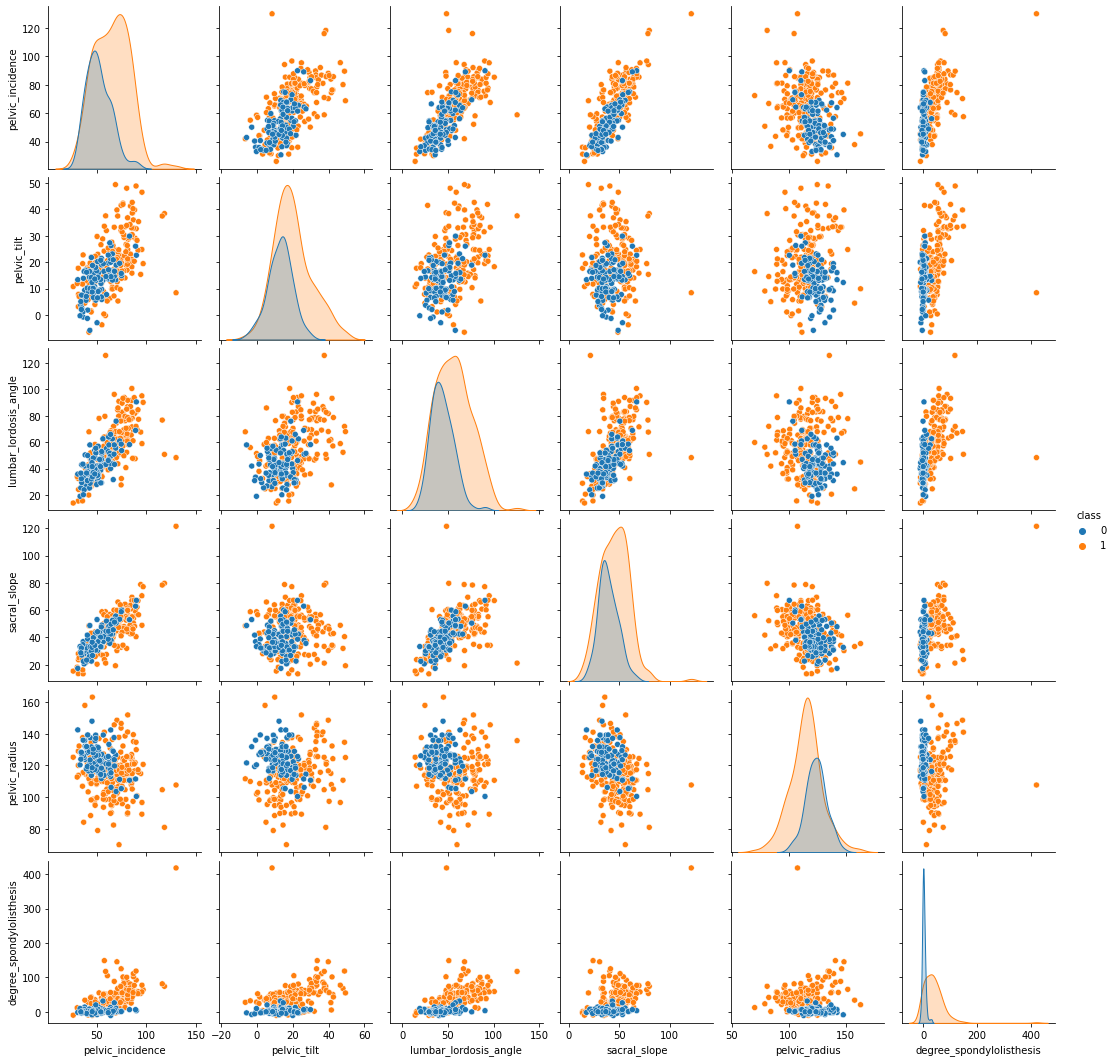

In [48]:
sns.pairplot(data = df, hue = 'class')

#### Blue dots are class 0, which are NOs. Orange dots are class 1, which are ABs.

# (ii)

### Make boxplots for each of the independent variables. Use color to showClasses 0 and 1

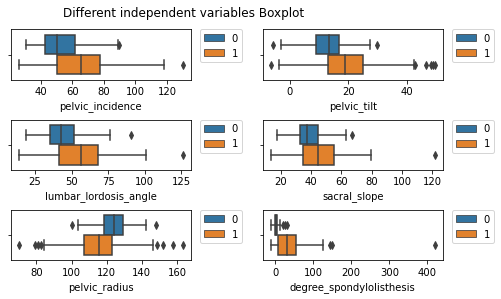

In [49]:
plt.subplot(3,2,1)
sns.boxplot(data = df, x = 'pelvic_incidence', hue = 'class', y = [""]*len(df))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.subplot(3,2,2)
sns.boxplot(data = df, x = 'pelvic_tilt', hue = 'class',y = [""]*len(df))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.subplot(3,2,3)
sns.boxplot(data = df, x = 'lumbar_lordosis_angle', hue = 'class',y = [""]*len(df))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.subplot(3,2,4)
sns.boxplot(data = df, x = 'sacral_slope', hue = 'class',y = [""]*len(df))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.subplot(3,2,5)
sns.boxplot(data = df, x = 'pelvic_radius', hue = 'class',y = [""]*len(df))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.subplot(3,2,6)
sns.boxplot(data = df, x = 'degree_spondylolisthesis', hue = 'class',y = [""]*len(df))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.suptitle('Different independent variables Boxplot')
plt.subplots_adjust(left=0.1,bottom=0.1, right=1.1, top=0.9, wspace=0.4, hspace=0.8)

#### Blue box stands for class 0, NO. Orange box stands for class 1, AB.

# (iii)

### Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set

In [50]:
Class0 = df.loc[df['class'] == 0]
Class1 = df.loc[df['class'] == 1]

In [51]:
Class0_train, Class0_test = train_test_split(Class0, train_size = 70, shuffle = False)
Class1_train, Class1_test = train_test_split(Class1, train_size = 140, shuffle = False)

In [52]:
train_set = pd.concat([Class0_train, Class1_train])
test_set = pd.concat([Class0_test,Class1_test])

#### As above, train set and test set are set up.

# Question 1 (c)

## Classification using KNN on Vertebral Column Data Set

# (i)

### Write code for k-nearest neighbors with Euclidean metric (or use a software package)

In [53]:
train_X = train_set.drop(columns = 'class')
train_Y = train_set['class']

In [54]:
KNN = KNeighborsClassifier(metric = 'euclidean')
KNN.fit(train_X, train_Y)

KNeighborsClassifier(metric='euclidean')

In [55]:
train_score = KNN.score(train_X, train_Y)
test_X = test_set.drop(columns = 'class')
test_Y = test_set['class']
test_score = KNN.score(test_X, test_Y)

In [56]:
train_score, test_score

(0.8523809523809524, 0.9)

# (ii)

### Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k ∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2

In [57]:
train_error = []
test_error = []
number = []

In [58]:
for k in range(208, 0, -3):
    number.append(k)
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(train_X, train_Y)
    train_error.append(1-KNN.score(train_X, train_Y))
    test_error.append(1-KNN.score(test_X, test_Y))

Text(0, 0.5, 'error')

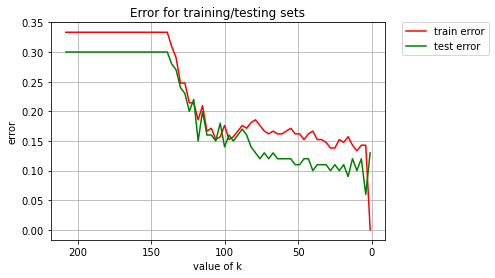

In [59]:
plt.plot(number, train_error, 'r', label = 'train error')
plt.plot(number, test_error, 'g', label = 'test error')
plt.title('Error for training/testing sets')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.gca().invert_xaxis()
plt.xlabel('value of k')
plt.ylabel('error')

In [60]:
pddf = pd.DataFrame(number, columns = ['k_value'])
pddf['test error'] = test_error
pddf.loc[pddf['test error'] == min(test_error)]

,k_value,test error
68,4,0.06


In [61]:
KNN = KNeighborsClassifier(n_neighbors = 4)
KNN.fit(train_X, train_Y)

KNeighborsClassifier(n_neighbors=4)

In [62]:
Pred_Y = KNN.predict(test_X)

In [63]:
cm = confusion_matrix(test_Y, Pred_Y) #confusion matrix
cm

array([[25,  5],
       [ 1, 69]])

In [64]:
precision = precision_score(test_Y, Pred_Y) #precision score
precision

0.9324324324324325

In [65]:
f1 = f1_score(test_Y, Pred_Y) #f1 score
f1

0.9583333333333333

In [66]:
TP = 25/(25+1) # true positive rate
TP

0.9615384615384616

In [67]:
TN = 69/(69+5) # true negative rate
TN

0.9324324324324325

#### As above, all the scores are calculated, with the ideal k* = 4. Confusion matrix is array([[25,  5], [ 1, 69]]), precision score is 0.9324, f1 score is 0.9583, true positive rate is 0.9615, true negative rate is 0.9324

# (iii)

### Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, 3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. 

In [68]:
N_list = []
test_error_rate = []
for N in range (10, 211, 10):
    min_error = 1
    N_list.append(N)
    train_set_new = pd.concat([Class0_train[:math.floor(N/3)], Class1_train[:N-math.floor(N/3)]])
    train_set_X = train_set_new.drop(columns = ['class'])
    train_set_Y = train_set_new['class']
    for k in range (1, N+1, 5):
        KNN = KNeighborsClassifier(n_neighbors = k)
        KNN.fit(train_set_X, train_set_Y)
        if (1 - KNN.score(test_X, test_Y) < min_error):
            min_error = 1 - KNN.score(test_X, test_Y)
        if k+5 >= N+1:
            test_error_rate.append(min_error)           

In [69]:
df_best_error = pd.DataFrame(N_list, columns = ['N'])
df_best_error['best error rate'] = test_error_rate

Text(0, 0.5, 'best test error')

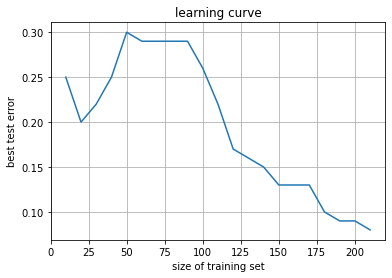

In [70]:
plt.plot(df_best_error['N'], df_best_error['best error rate'])
plt.grid(True)
plt.title('learning curve')
plt.xlabel('size of training set')
plt.ylabel('best test error')

#### As above, learning curve is plotted

# Question 1 (d)
### Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}

# (i) 
## Minkowski Distance
### A. which becomes Manhattan Distance with p = 1.

In [71]:
metric_list = ['Manhattan', 'log(p)', 'Chebyshev', 'Mahalanobis']
best_error_k_value = []
Best_error_test = []

In [72]:
Min_error = 1
k_value = 1
for k in range (1, 197, 5):
    KNN = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan')
    KNN.fit(train_X, train_Y)
    if 1-KNN.score(test_X, test_Y) < Min_error:
        if k == 1:
            continue
        Min_error = 1-KNN.score(test_X, test_Y)
        k_value = k
    if k+5 >= 197:
        best_error_k_value.append(k_value)
        Best_error_test.append(Min_error)

In [73]:
best_error_k_value, Best_error_test 

([6], [0.10999999999999999])

#### Here I passed the case when k = 1, the next smallest k that derives the minimum test error is when k = 6. Error is 0.1099 in this case

### B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [74]:
Min_error = 1
best_error_k_value.append(6)
best_p = 1
for i in np.arange (0.1, 1.1, 0.1):
    p_value = 10 ** i
    KNN = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = p_value)
    KNN.fit(train_X, train_Y)
    if 1-KNN.score(test_X, test_Y) < Min_error:
        Min_error = 1-KNN.score(test_X, test_Y)
        best_p = math.log10(p_value)
    if i == 1:
        Best_error_test.append(Min_error)

In [75]:
best_error_k_value, Best_error_test 

([6, 6], [0.10999999999999999, 0.06000000000000005])

In [76]:
best_p

0.6

#### With k=6 in the last question, the best log10(p) is 0.6. Error is 0.06 in this case

### C. which becomes Chebyshev Distance with p → ∞

In [77]:
Min_error = 1
k_value = 1
for k in range (1, 197, 5):
    KNN = KNeighborsClassifier(n_neighbors = k, metric = 'chebyshev')
    KNN.fit(train_X, train_Y)
    if 1-KNN.score(test_X, test_Y) < Min_error:
        Min_error = 1-KNN.score(test_X, test_Y)
        k_value = k
    if k+5 >= 197:
        best_error_k_value.append(k_value)
        Best_error_test.append(Min_error)

In [78]:
best_error_k_value, Best_error_test 

([6, 6, 16], [0.10999999999999999, 0.06000000000000005, 0.07999999999999996])

#### In this case, the optimal k value is 16, with test error 0.0799

# (ii)
## Mahalanobis Distance

In [79]:
Min_error = 1
k_value = 1
for k in range (1, 197, 5):
    KNN = KNeighborsClassifier(n_neighbors = k, metric = 'mahalanobis', metric_params={'VI': np.linalg.inv(np.cov(train_X, rowvar = False))})
    KNN.fit(train_X, train_Y)
    if k == 1:
        continue
    if 1-KNN.score(test_X, test_Y) < Min_error:
        Min_error = 1-KNN.score(test_X, test_Y)
        k_value = k
    if k+5 >= 197:
        best_error_k_value.append(k_value)
        Best_error_test.append(Min_error)

In [80]:
best_error_k_value, Best_error_test 

([6, 6, 16, 6],
 [0.10999999999999999,
  0.06000000000000005,
  0.07999999999999996,
  0.15000000000000002])

#### In this case, the k value is 6 and minimum test error is 0.15

In [81]:
dataframe = pd.DataFrame({'Metric': metric_list, 'k* value': best_error_k_value, 'Test error': Best_error_test })
dataframe

,Metric,k* value,Test error
0,Manhattan,6,0.11
1,log(p),6,0.06
2,Chebyshev,16,0.08
3,Mahalanobis,6,0.15


#### As the table above, I I got the best k* value base on the minimum test error in each cases. 

# Question 1 (e)
### The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

In [82]:
Metrics = ['Euclidean', 'Manhattan', 'Chebyshev']
K_Values = []
Best_Test_Error = []

In [83]:
Min_error = 1
k_value = 1
for k in range (1, 197, 5):
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric = 'euclidean')
    KNN.fit(train_X, train_Y)
    if 1-KNN.score(test_X, test_Y) < Min_error:
        if k == 1:
            continue
        Min_error = 1-KNN.score(test_X, test_Y)
        k_value = k
    if k+5 >= 197:
        K_Values.append(k_value)
        Best_Test_Error.append(Min_error)

In [84]:
Min_error = 1
k_value = 1
for k in range (1, 197, 5):
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric = 'manhattan')
    KNN.fit(train_X, train_Y)
    if 1-KNN.score(test_X, test_Y) < Min_error:
        if k == 1:
            continue
        Min_error = 1-KNN.score(test_X, test_Y)
        k_value = k
    if k+5 >= 197:
        K_Values.append(k_value)
        Best_Test_Error.append(Min_error)

In [85]:
Min_error = 1
k_value = 1
for k in range (1, 197, 5):
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric = 'chebyshev')
    KNN.fit(train_X, train_Y)
    if 1-KNN.score(test_X, test_Y) < Min_error:
        if k == 1:
            continue
        Min_error = 1-KNN.score(test_X, test_Y)
        k_value = k
    if k+5 >= 197:
        K_Values.append(k_value)
        Best_Test_Error.append(Min_error)

In [86]:
Dataframe = pd.DataFrame({'Metric': Metrics, 'k value': K_Values, 'Best test error': Best_Test_Error })
Dataframe

,Metric,k value,Best test error
0,Euclidean,6,0.10
1,Manhattan,26,0.10
2,Chebyshev,16,0.11


#### With weights according to distances, the k values and the best test errors are recorded in the above table

# Question 1 (f)
### What is the lowest training error rate you achieved in this homework?

##### The lowest training rate I achieved is 0.06. It happened two times. 
##### 1) When I use majority polling, select k = 4, and use Euclidean metric, I got test error rate 0.06.
##### 2) When I use log10(p) = 0.6, take this p value and use Minkowski metric, with k = 6, I got test error rate 0.06